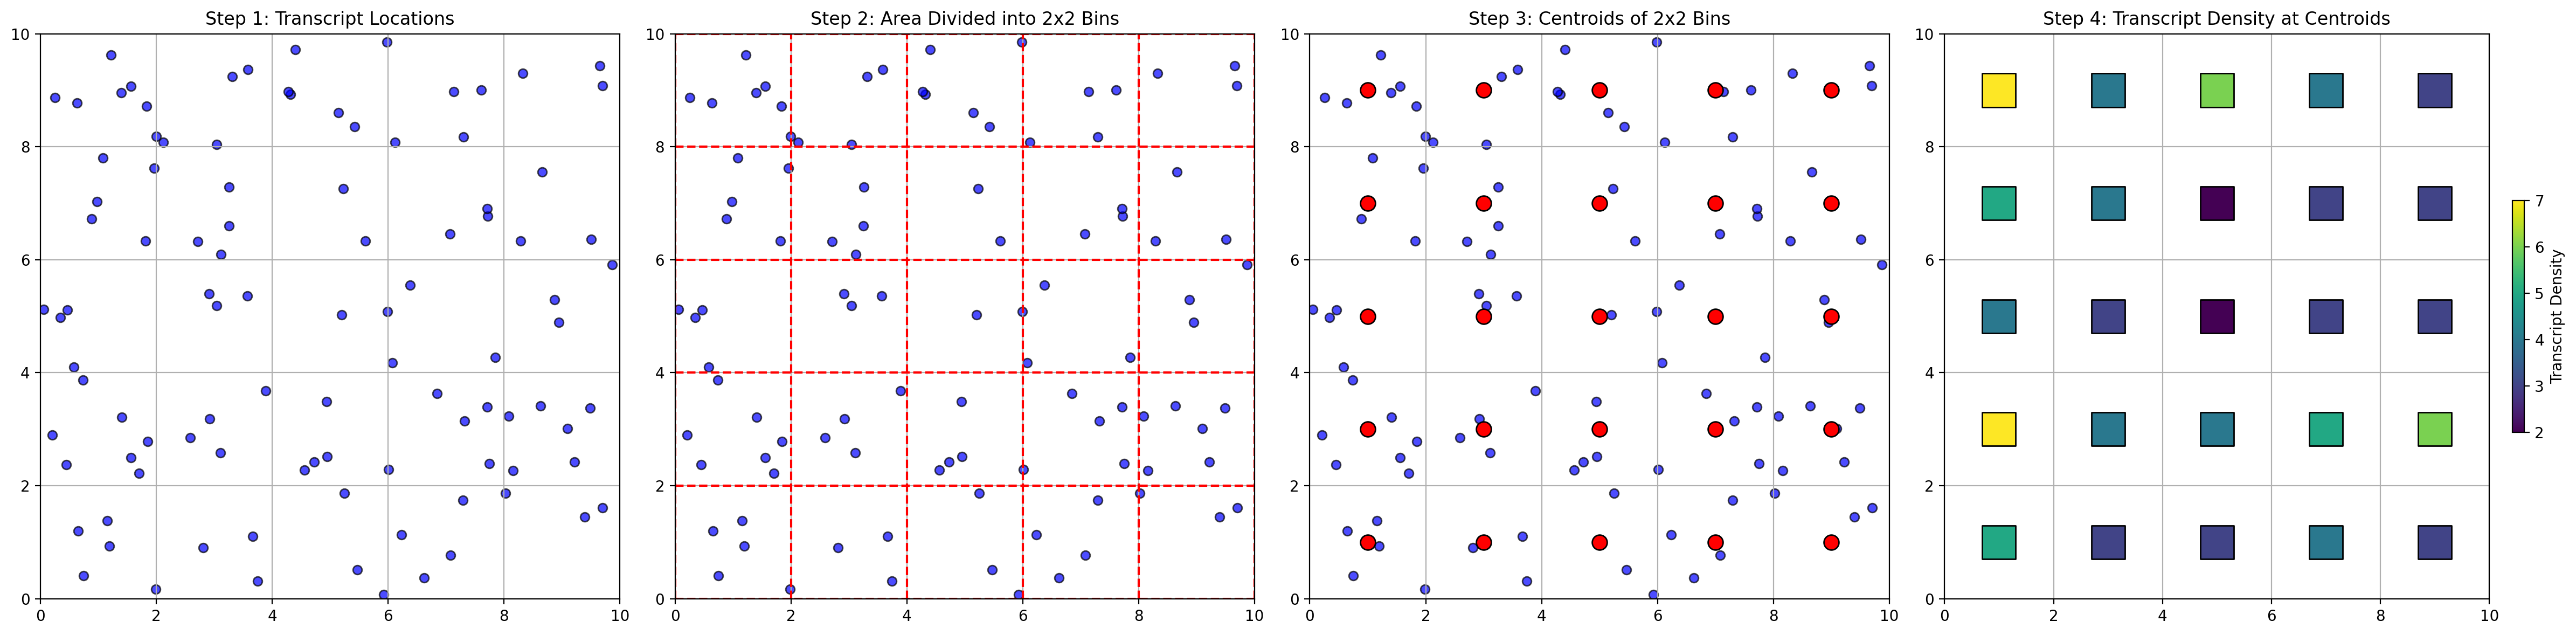

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# 1. Generate random transcript locations
np.random.seed(42)
num_transcripts = 100
x_coords = np.random.uniform(0, 10, num_transcripts)
y_coords = np.random.uniform(0, 10, num_transcripts)

# 2. Divide the area into 2x2 bins
bin_size = 2
x_bins = np.arange(0, 10 + bin_size, bin_size)
y_bins = np.arange(0, 10 + bin_size, bin_size)

# 3. Find centroids of the 2x2 bins
x_centroids = (x_bins[:-1] + x_bins[1:]) / 2
y_centroids = (y_bins[:-1] + y_bins[1:]) / 2
centroids = np.array(np.meshgrid(x_centroids, y_centroids)).T.reshape(-1, 2)

# 4. Assign each transcript to the nearest bin centroid
transcripts = np.vstack((x_coords, y_coords)).T
tree = cKDTree(centroids)
_, indices = tree.query(transcripts)
assigned_centroids = centroids[indices]

# 5. Calculate density at each centroid
unique_centroids, counts = np.unique(assigned_centroids, axis=0, return_counts=True)

# Create side-by-side plots
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Step 1: Plot the original transcript locations
axes[0].scatter(x_coords, y_coords, c='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Step 1: Transcript Locations')
axes[0].set_xlim(0, 10)
axes[0].set_ylim(0, 10)
axes[0].grid(True)

# Step 2: Plot the bins
axes[1].scatter(x_coords, y_coords, c='blue', alpha=0.7, edgecolor='black')
for x_bin in x_bins:
    axes[1].axvline(x=x_bin, color='red', linestyle='--')
for y_bin in y_bins:
    axes[1].axhline(y=y_bin, color='red', linestyle='--')
axes[1].set_title('Step 2: Area Divided into 2x2 Bins')
axes[1].set_xlim(0, 10)
axes[1].set_ylim(0, 10)
axes[1].grid(True)

# Step 3: Plot the centroids on the same grid
axes[2].scatter(x_coords, y_coords, c='blue', alpha=0.7, edgecolor='black')
axes[2].scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, edgecolor='black')
axes[2].set_title('Step 3: Centroids of 2x2 Bins')
axes[2].set_xlim(0, 10)
axes[2].set_ylim(0, 10)
axes[2].grid(True)

# Step 4 & 5: Final Visualization: Density Coloring at Centroids
sc = axes[3].scatter(unique_centroids[:, 0], unique_centroids[:, 1], c=counts, s=500, cmap='viridis', marker='s', edgecolor='black')
axes[3].set_title('Step 4: Transcript Density at Centroids')
axes[3].set_xlim(0, 10)
axes[3].set_ylim(0, 10)
axes[3].grid(True)

# Add colorbar for the density plot
cbar = plt.colorbar(sc, ax=axes[3], orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Transcript Density')

plt.tight_layout()
plt.show()
